<a href="https://colab.research.google.com/github/nandinwp/mpv-puc-dataset/blob/main/MVP_PUC_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MVP de Análise de Dados e Boas Práticas**

Luís Fernando Andrade Cordeiro

**1° -Definição do problema**


Este conjunto de dados aborda os efeitos do álcool no desempenho dos alunos no ensino secundário de duas escolas portuguesas. Os atributos de dados incluem notas dos alunos, características demográficas, sociais e relacionadas à escola) e foram coletados por meio de relatórios escolares e questionários. São fornecidos dois conjuntos de dados relativos ao desempenho em duas disciplinas distintas: Matemática (mat) e Língua Portuguesa (por). Em [Cortez e Silva, 2008], os dois conjuntos de dados foram modelados sob classificação binária/de cinco níveis e tarefas de regressão. Observação importante: o atributo alvo G3 possui forte correlação com os atributos G2 e G1. Isso ocorre porque G3 é a nota final do ano (emitida no 3º período), enquanto G1 e G2 correspondem às notas do 1º e 2º período. É mais difícil prever G3 sem G2 e G1, mas essa previsão é muito mais útil (consulte a fonte do artigo para obter mais detalhes). O dataset pode ser encontrado em: https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study

**Para compreender adequadamente as informações relacionadas às notas apresentadas neste conjunto de dados, é importante ter em mente que os dados foram coletados em Portugal e que, neste contexto, as notas do ensino secundário variam entre 0 e 20, sendo este o valor máximo possível. Portanto, quaisquer análises ou interpretações feitas com base nesses dados devem levar em consideração essa escala específica de notas utilizada em Portugal, a fim de garantir uma compreensão precisa dos resultados.**

# Descrição dos atributos
1. **school** - escola do aluno (binário: 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira).
2.   **Sex** - sexo do aluno (binário: 'F' - feminino ou 'M' - masculino).
3. **age** - idade do aluno (numérico: de 15 a 22)
4. **address** - tipo de endereço residencial do aluno (binário: 'U' - urbano ou 'R' - rural)
5. **famsize** - tamanho da família (binário: 'LE3' - menor ou igual a 3 ou 'GT3' - maior que 3)
6. **Pstatus** - status de coabitação dos pais (binário: 'T' - morando junto ou 'A' - separado)
7. **Medu** - escolaridade da mãe (numérico: 0 - nenhuma, 1 - ensino fundamental (4ª série), 2 - 5ª a 9ª série, 3 - ensino médio ou 4 - ensino superior)
8. **Fedu** - escolaridade do pai (numérico: 0 - nenhuma, 1 - ensino fundamental (4ª série), 2 - 5ª a 9ª série, 3 - ensino médio ou 4 - ensino superior)
9. **Mjob** - trabalho da mãe (nominal: 'professor', 'saúde' relacionado a cuidados, 'serviços' civis (por exemplo, administrativo ou policial), 'at_home' ou 'outros')
10. **Fjob** - trabalho do pai (nominal: 'professor', 'saúde' relacionado a cuidados, 'serviços' civis (por exemplo, administrativo ou policial), 'at_home' ou 'outros')
11. **reason** - razão para escolher esta escola (nominal: perto de 'casa', 'reputação' da escola, preferência de 'curso' ou 'outro')
12. **guardian** - tutor do aluno (nominal: 'mãe', 'pai' ou 'outro')
13. **traveltime** - tempo de viagem de casa para a escola (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, ou 4 - >1 hora)
14. **studytime** - tempo de estudo semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas ou 4 - >10 horas)
15. **failures** - número de reprovações anteriores (numérico: n se 1<=n<3, senão 4)
16. **schoolsup** - suporte educacional extra (binário: sim ou não)
17. **fumsup** - apoio educacional familiar (binário: sim ou não)
18. **paid** - aulas extras pagas dentro da disciplina do curso (Matemática ou Português) (binário: sim ou não)
19. **activities** - atividades extracurriculares (binário: sim ou não)
20. **nursery** - frequentou a creche (binário: sim ou não)
21. **higher** - quer cursar o ensino superior (binário: sim ou não)
22. **internet** - Acesso à Internet em casa (binário: sim ou não)
23. **romantic** -com um relacionamento romântico (binário: sim ou não)
24. **famrel** - qualidade das relações familiares (numérico: de 1 - muito ruim a 5 - excelente)
25. **freetime** - tempo livre depois da escola (numérico: de 1 - muito baixo a 5 - muito alto)
26. **goout** - sair com amigos (numérico: de 1 - muito baixo a 5 - muito alto)
27. **Dalc** - consumo de álcool no dia de trabalho (numérico: de 1 - muito baixo a 5 - muito alto)
28. **Walc** - consumo de álcool no final de semana (numérico: de 1 - muito baixo a 5 - muito alto)
29. **health** - estado de saúde atual (numérico: de 1 - muito ruim a 5 - muito bom)
30. **absences** - número de faltas escolares (numérico: de 0 a 93)

In [1]:
# Configuração para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

# Biblioteca de visualização
import seaborn as sb 

# Biblioteca para trabalhar com hora e data
import datetime as dt

# Biblioteca para funções matematicas
import math

#Biblioteca para trabalhar com dados temporais
import statsmodels.api as sm

# Fundo escuro para plotar graficos no Jupyter notebook
sb.set_style('darkgrid')
%matplotlib inline

# Importação de pacotes
import numpy as np
import pandas as pd
import missingno as ms # para tratamento de missings

import matplotlib
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
import matplotlib.pyplot as plt

## Transformações númericas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

## Transformações categoricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 2º - Carregamento dos dados

  Estou usando pacote pandas para carregar o meu arquivo .csv que está localizado no github, após carregalo eu crio um dataframe e exibo duas 10 primeiras colunas.

In [2]:
# Url do meu dataset
url_matematica = 'https://raw.githubusercontent.com/nandinwp/mpv-puc-dataset/main/student-mat.csv'
url_portugues = 'https://raw.githubusercontent.com/nandinwp/mpv-puc-dataset/main/student-por.csv'

# Criando dataframe para dados das duas matérias
def_math = pd.read_csv(url_matematica, delimiter=';', encoding='ISO-8859-1')
def_port = pd.read_csv(url_portugues, delimiter=';', encoding='ISO-8859-1')

# Visualização das 5 primeiras colunas: Matemática
def_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# Visualização das 5 primeiras colunas: Português
def_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


#  3º - Análise de Dados

Agora vamos examinar os dados passo a passo entender todos os seus aspectos

In [4]:
# Vamos verificar se temos algum valor nulo em def_math usando info()
def_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
# Agora o mesmo para def_port
def_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
# Agora vamos verificar a quantidade de valores ausentes de cada um
def_math.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
# O mesmo para def_port
def_port.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
# Verificamos que muitos dos dados são do tipo objeto, vamos mudar para tipo categoria

def_math[['school','sex','address','famsize', 'Pstatus','Mjob','Fjob',
         'reason','guardian','schoolsup','famsup','paid','activities','nursery',
         'higher','internet','romantic']] = def_math[['school','sex','address','famsize','Pstatus','Mjob','Fjob',
                                                     'reason','guardian','schoolsup',
         'famsup','paid','activities','nursery','higher','internet','romantic']].astype('category')

def_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

In [9]:
def_port[['school','sex','address','famsize', 'Pstatus','Mjob','Fjob',
         'schoolsup','reason','guardian','famsup','paid','activities','nursery',
         'higher','internet','romantic']] = def_port[['school','sex','address',
                                                                    'famsize','Pstatus','Mjob','Fjob','schoolsup',
         'reason','guardian','famsup','paid','activities','nursery','higher','internet','romantic']].astype('category')

def_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      649 non-null    category
 1   sex         649 non-null    category
 2   age         649 non-null    int64   
 3   address     649 non-null    category
 4   famsize     649 non-null    category
 5   Pstatus     649 non-null    category
 6   Medu        649 non-null    int64   
 7   Fedu        649 non-null    int64   
 8   Mjob        649 non-null    category
 9   Fjob        649 non-null    category
 10  reason      649 non-null    category
 11  guardian    649 non-null    category
 12  traveltime  649 non-null    int64   
 13  studytime   649 non-null    int64   
 14  failures    649 non-null    int64   
 15  schoolsup   649 non-null    category
 16  famsup      649 non-null    category
 17  paid        649 non-null    category
 18  activities  649 non-null    category
 19  nursery 

# 4 º Pré-Processamento de dados

Vamos converter a coluna 'Mjob' do DataFrame 'def_math' e 'def_port' em uma variável categórica, onde os valores possíveis são 'at_home', 'health', 'other', 'services' e 'teacher'.

In [10]:
# Vamos verificar os valores unicos para melhorar a análise
def_math.Mjob.unique()

['at_home', 'health', 'other', 'services', 'teacher']
Categories (5, object): ['at_home', 'health', 'other', 'services', 'teacher']

In [11]:
# Para matemática
def_math.Mjob = pd.Categorical(def_math.Mjob, ['at_home', 'health', 'other', 'services', 'teacher'])
def_math.Fjob = pd.Categorical(def_math.Fjob, ['at_home', 'health', 'other', 'services', 'teacher'])
# Para português
def_port.Mjob = pd.Categorical(def_port.Mjob, ['at_home', 'health', 'other', 'services', 'teacher'])
def_port.Fjob = pd.Categorical(def_port.Fjob, ['at_home', 'health', 'other', 'services', 'teacher'])

In [12]:
# Agora vamos ver um resumo estatístico descritivo da distribuição dos valores presentes na coluna 'reason'
def_math.reason.describe()

count        395
unique         4
top       course
freq         145
Name: reason, dtype: object

In [13]:
# O mesmo para português
def_port.reason.describe()

count        649
unique         4
top       course
freq         285
Name: reason, dtype: object

In [54]:
#Antes de plotar vamos converter a exibição binário: 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira
def_math['school'] = def_math['school'].replace({'GP': 'Gabriel Pereira', 'MS': 'Mousinho da Silveira'})
def_port['school'] = def_port['school'].replace({'GP': 'Gabriel Pereira', 'MS': 'Mousinho da Silveira'})

# Sexo
def_math['sex'] = def_math['sex'].replace({'F': 'Feminino', 'M': 'Masculino'})
def_port['sex'] = def_port['sex'].replace({'F': 'Feminino', 'M': 'Masculino'})

# Endereço
def_math['address'] = def_math['address'].replace({'u': 'Urbano', 'r': 'Rural'})
def_port['address'] = def_port['address'].replace({'u': 'Urbano', 'r': 'Rural'})

# Pstatus - status de coabitação dos pais (binário: 'T' - morando junto ou 'A' - separado)
def_math['Pstatus'] = def_math['Pstatus'].replace({'t': 'morando junto', 'a': 'separado'})
def_port['Pstatus'] = def_port['Pstatus'].replace({'t': 'morando junto', 'a': 'separado'})

# Cria um dicionário com as substituições que desejamos fazer
dicionario_substituicoes = {1: 'muito baixo', 2: 'baixo', 3: 'moderado', 4: 'alto', 5: 'muito alto'}

# Usa o método replace() para substituir os valores de acordo com o dicionário
def_math['Dalc'] = def_math['Dalc'].replace(dicionario_substituicoes)
def_port['Dalc'] = def_port['Dalc'].replace(dicionario_substituicoes)

def_math['Walc'] = def_math['Walc'].replace(dicionario_substituicoes)
def_port['Walc'] = def_port['Walc'].replace(dicionario_substituicoes)

# Criando um dicionário com as traduções desejadas
job_dict = {'at_home': 'em casa',
            'health': 'saúde',
            'other': 'outros',
            'services': 'serviços',
            'teacher': 'professor'}

# Aplicando o dicionário às colunas desejadas para matemática
def_math[['Mjob', 'Fjob']] = def_math[['Mjob', 'Fjob']].applymap(job_dict.get)

# Aplicando o dicionário às colunas desejadas para português
def_port[['Mjob', 'Fjob']] = def_port[['Mjob', 'Fjob']].applymap(job_dict.get)

# 5 º Visualização de dados

Agora que já verificamos os dados podemos começar a visualizar o mesmo.
Vamos começar dando uma olhada no número de alunos em cada escola por disciplina.

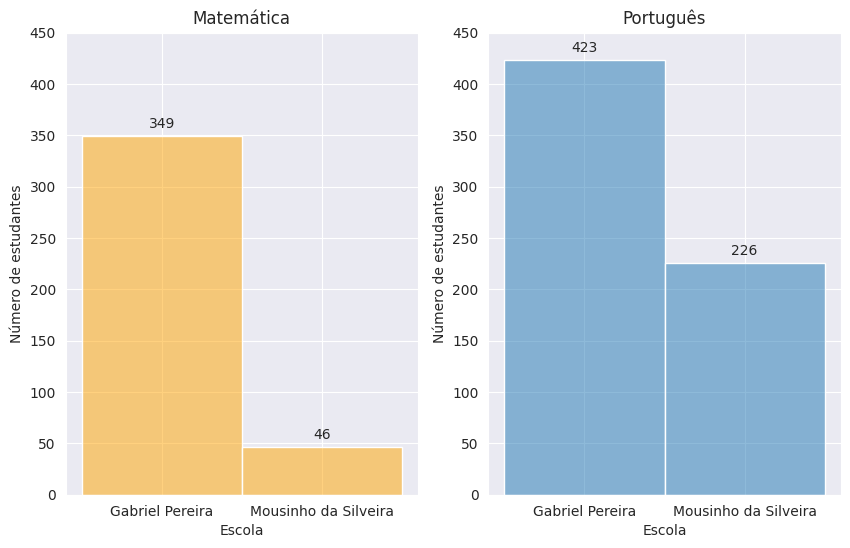

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plot = sb.histplot(data=def_math, x='school', color='#FFA500', alpha=0.5)
plt.title('Matemática')
plt.xlabel('Escola')
plt.ylabel('Número de estudantes')
plt.ylim(0,450)

for bar in plot.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, int(bar.get_height()), ha='center', va='bottom')

plt.subplot(1,2,2)
plot = sb.histplot(data=def_port, x='school', color='#1F77B4', alpha=0.5)
plt.title('Português')
plt.xlabel('Escola')
plt.ylabel('Número de estudantes')
plt.ylim(0,450)

for bar in plot.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, int(bar.get_height()), ha='center', va='bottom')

plt.show()

No código acima, foi utilizado plot.patches para acessar as barras do histograma, depois converti esses valores para inteiro e depois o terceiro argumento da função plt.text eu defini a distância vertical entre o topo da barra e o texto exibido em cima dela.

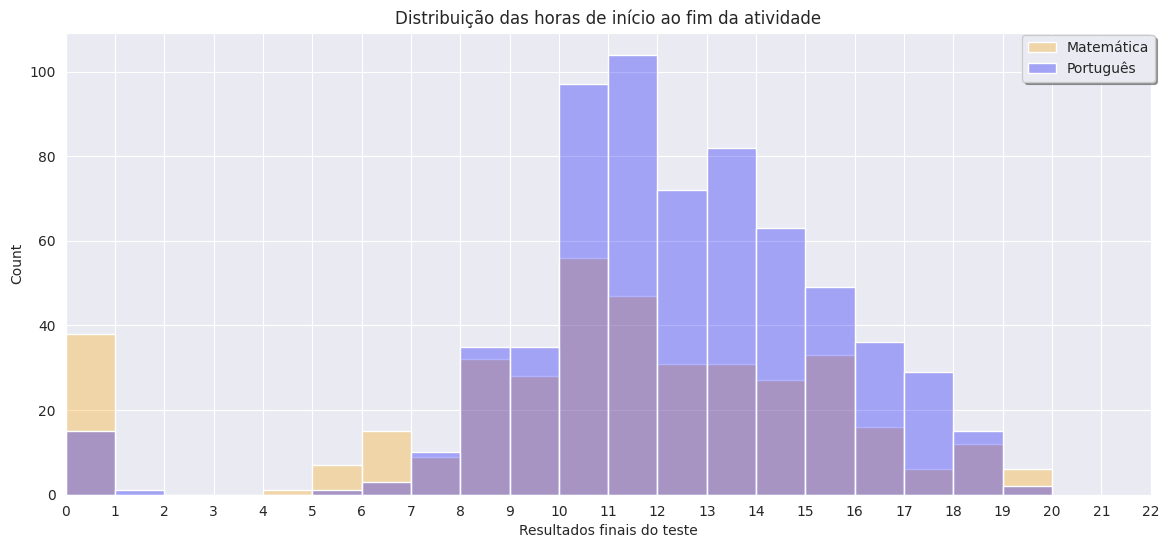

In [16]:
# Agora vamos plotar a distribuição dos resultados dos testes finais dos alunos por disciplinas.

bins2 = np.arange(0, max(def_math.G3)+1, 1)
plt.figure(figsize = [14,6])
sb.histplot(data = def_math, x=def_math.G3, bins = bins2, color = 'orange', kde = False, alpha = 0.3)
plt.title('Distribuição das horas de início ao fim da atividade')
plt.xlabel('Resultados finais do teste')
plt.xticks(range(0,24))
plt.xlim(0,22)
sb.histplot(data = def_port, x=def_port.G3, bins = bins2, color ='blue', kde = False, alpha =0.3)
plt.legend(labels=['Matemática','Português'],title='', bbox_to_anchor=(1.01, 1.01),fancybox = True, shadow =True)# Barra de legenda
plt.show()

Agora vamos plotar o os empregos dos pais por tipo de trabalho.

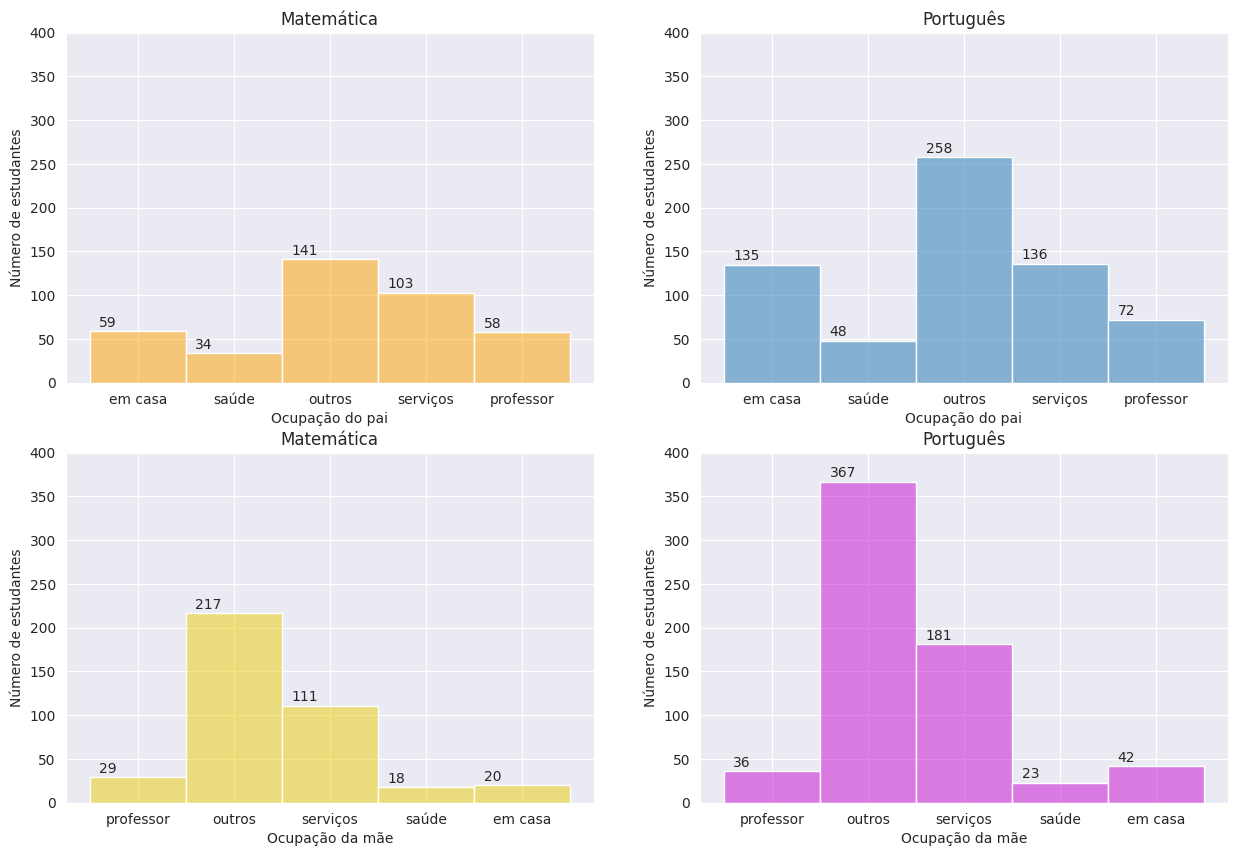

In [29]:
#Define o tamanho da figura em polegadas.
plt.figure(figsize=(15,10))

#Define um subplot na primeira posição da matriz 2x2 de subplots. A seguir, cria 
#um histograma com a distribuição das ocupações dos pais na coluna "Mjob" da base de dados "def_math". 
#O parâmetro "color" especifica a cor das barras no gráfico, e "alpha" determina a transparência dessas barras.
# Os comandos "title", "xlabel" e "ylabel" especificam os rótulos dos eixos do gráfico, e "ylim" define o intervalo do eixo y.

plt.subplot(2,2,1)
ax1 = sb.histplot(data = def_math, x='Mjob', color='#FFA500', alpha=0.5)
plt.title('Matemática')
plt.xlabel('Ocupação do pai')
plt.ylabel('Número de estudantes')
plt.ylim(0,400)
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
    
plt.subplot(2,2,2)
ax2 = sb.histplot(data = def_port, x='Mjob',color='#1F77B4',  alpha=0.5)
plt.title('Português')
plt.xlabel('Ocupação do pai')
plt.ylabel('Número de estudantes')
plt.ylim(0,400)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

plt.subplot(2,2,3)
ax3 = sb.histplot(data = def_math, x='Fjob', color='#EBCE07', alpha=0.5)
plt.title('Matemática')
plt.xlabel('Ocupação da mãe')
plt.ylabel('Número de estudantes')
plt.ylim(0,400)
for p in ax3.patches:
    ax3.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

plt.subplot(2,2,4)
ax4 = sb.histplot(data = def_port, x='Fjob',color='#C80CD4',  alpha=0.5)
plt.title('Português')
plt.xlabel('Ocupação da mãe')
plt.ylabel('Número de estudantes')
plt.ylim(0,400)
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+5))


Agora vamos plotar os resultados do Teste Final dos alunos nas disciplinas por sexo

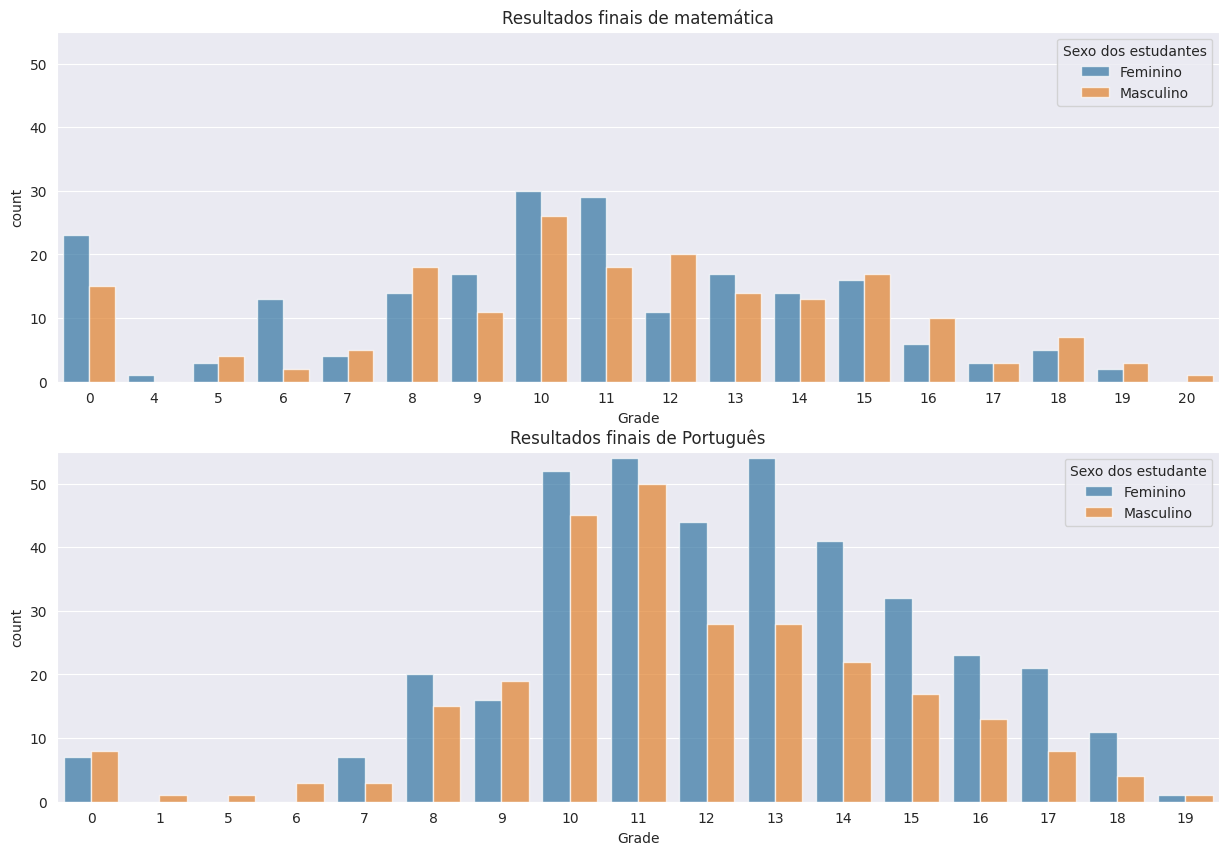

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sb.countplot(data=def_math, x='G3', hue='sex', hue_order=def_math.sex.unique(), alpha =0.7)
plt.xlabel('Grade')
plt.legend(title='Sexo dos estudantes')
plt.title('Resultados finais de matemática')
plt.ylim(0,55)
plt.subplot(2,1,2)
sb.countplot(data=def_port, x='G3', hue='sex', hue_order=def_port.sex.unique(), alpha =0.7)
plt.xlabel('Grade')
plt.legend(title='Sexo dos estudante')
plt.title('Resultados finais de Português')
plt.ylim(0,55);

Agora vamos ver o efeito do Álcool nos resultados dos alunos. Vamos plotar os resultados finais( Matemática ) em função do nível de consumo de álcool pelos alunos (dividido por escolas).

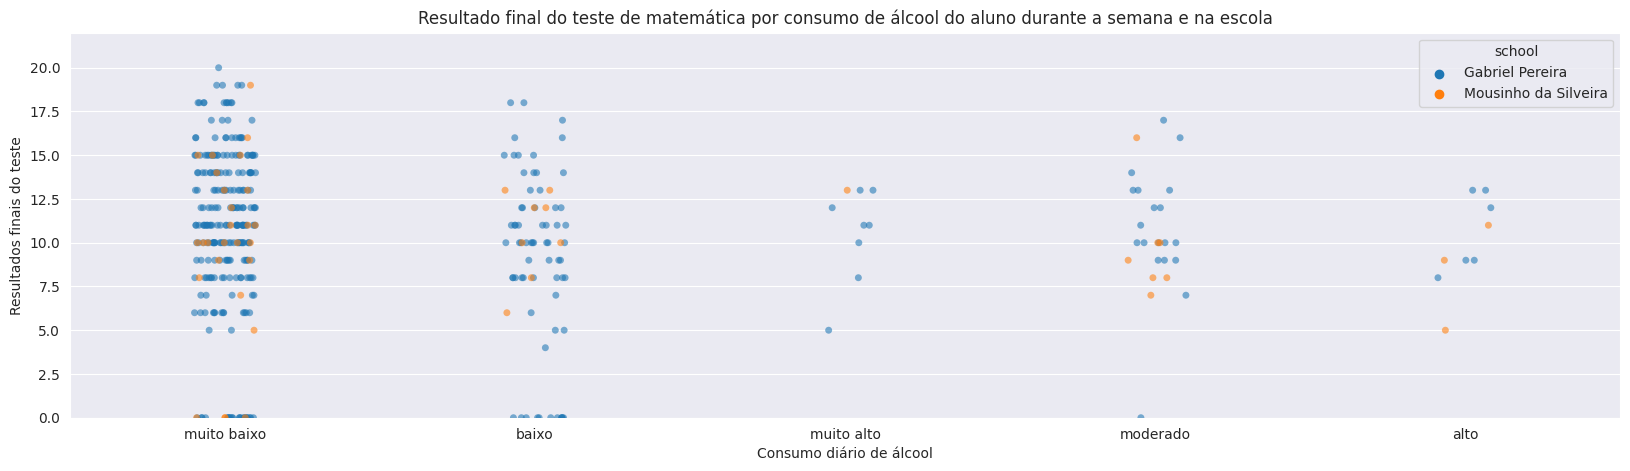

In [34]:
plt.figure(figsize=(20,5))
sb.stripplot(data=def_math, x='Dalc', y='G3',hue='school', alpha = 0.58)
plt.xlabel('Consumo diário de álcool')
plt.ylabel('Resultados finais do teste')
plt.title("Resultado final do teste de matemática por consumo de álcool do aluno durante a semana e na escola")
plt.ylim(0,22);

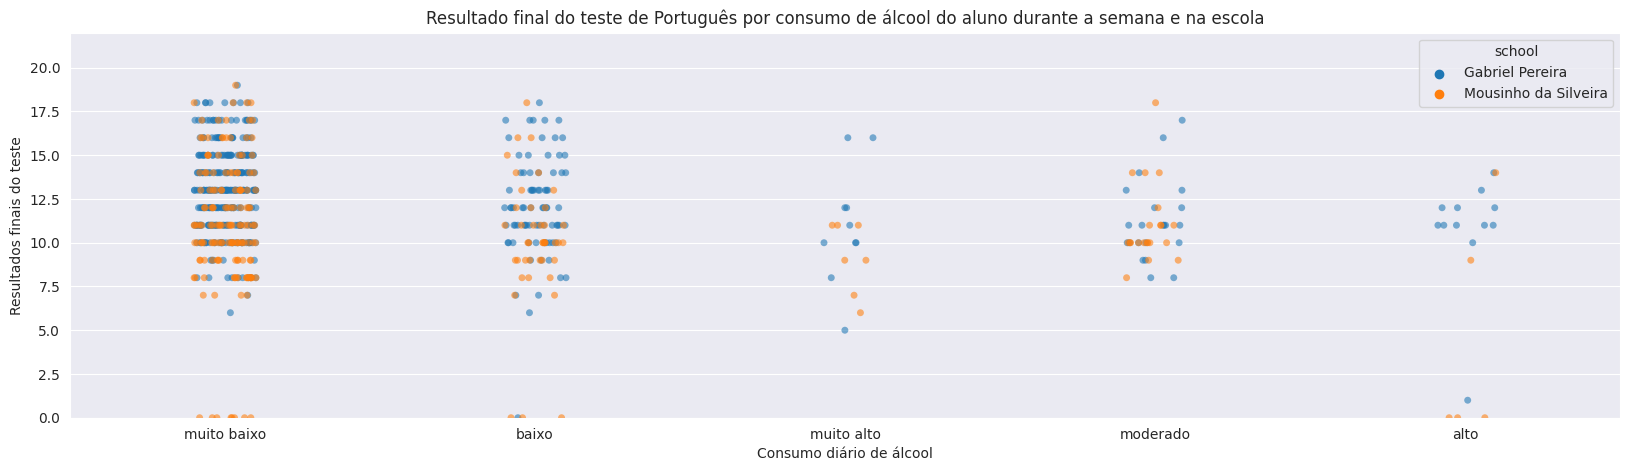

In [33]:
plt.figure(figsize=(20,5))
sb.stripplot(data=def_port, x='Dalc', y='G3',hue='school', alpha = 0.58)
plt.xlabel('Consumo diário de álcool')
plt.ylabel('Resultados finais do teste')
plt.title("Resultado final do teste de Português por consumo de álcool do aluno durante a semana e na escola")
plt.ylim(0,22);

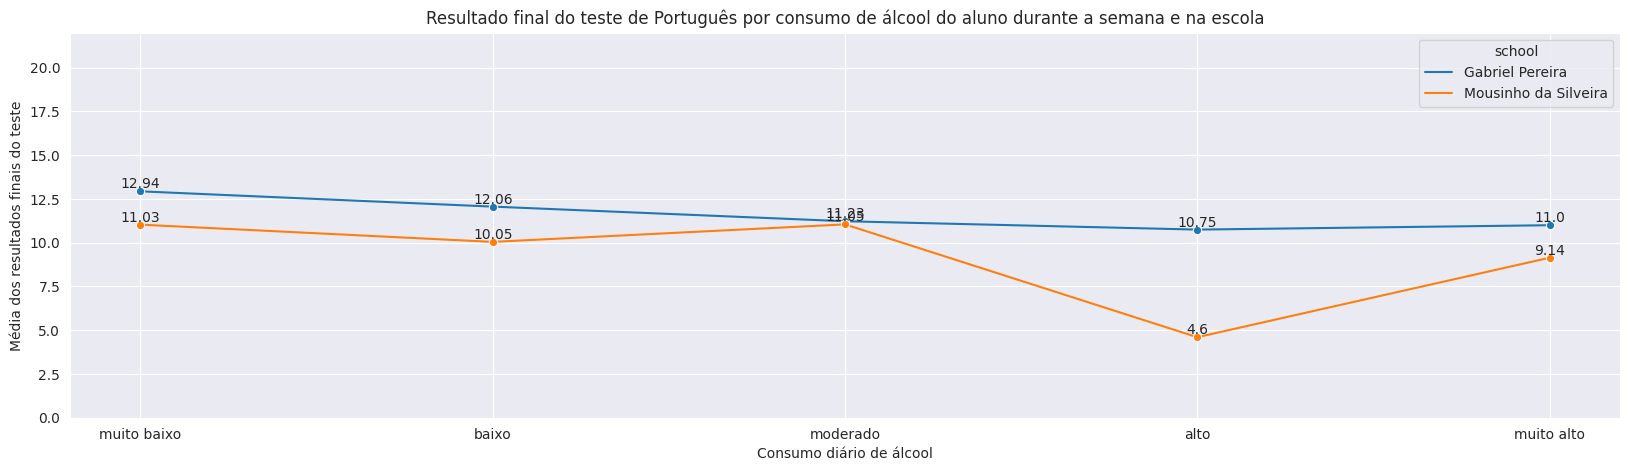

In [51]:
# Define a ordem das categorias
ordem = ['muito baixo', 'baixo', 'moderado', 'alto', 'muito alto']
plt.figure(figsize=(20,5))
# Converte a coluna para uma categoria com a ordem desejada
def_port['Dalc'] = pd.Categorical(def_port['Dalc'], categories=ordem)

# Agrupa os dados pela média da nota final por nível de consumo de álcool diário e escola
grouped_data = def_port.groupby(['Dalc', 'school']).mean()['G3'].reset_index()

# Plota o gráfico em linha com a ordem definida
sb.lineplot(data=grouped_data, x='Dalc', y='G3', hue='school', marker='o')

# Adiciona os valores aos marcadores
for x, y, label in zip(grouped_data['Dalc'], grouped_data['G3'], grouped_data['G3']):
    label = round(label, 2)
    plt.text(x, y, label, ha='center', va='bottom', fontsize=10)

# Define os rótulos dos eixos e título do gráfico
plt.xlabel('Consumo diário de álcool')
plt.ylabel('Média dos resultados finais do teste')
plt.title("Resultado final do teste de Português por consumo de álcool do aluno durante a semana e na escola")
plt.ylim(0,22)

# Exibe o gráfico
plt.show()


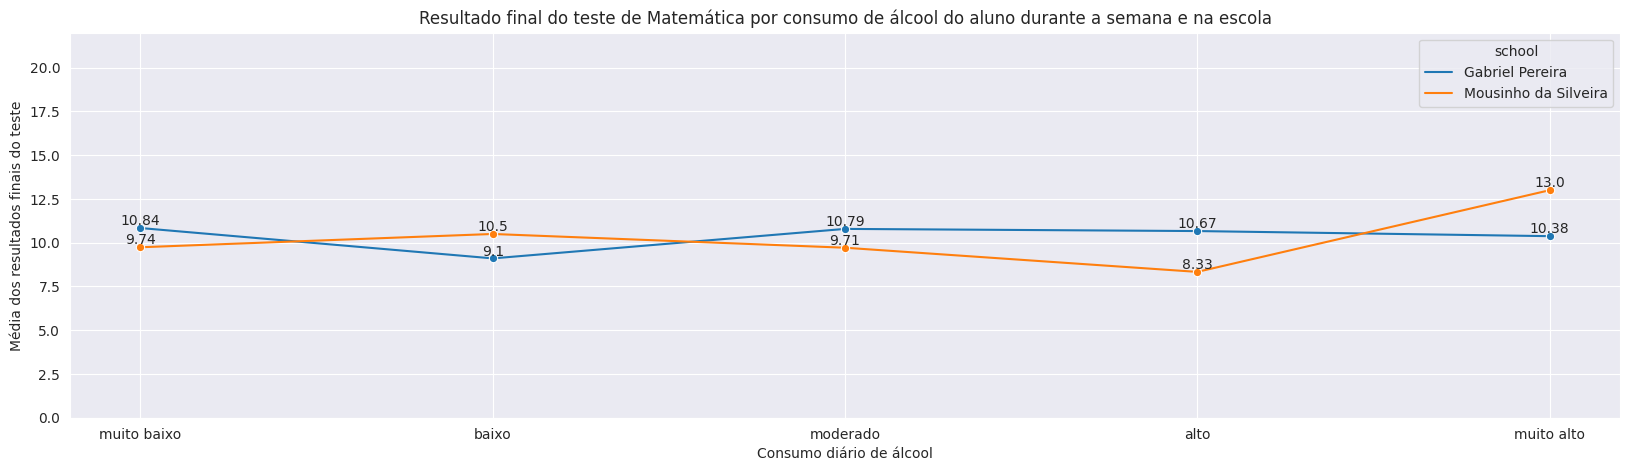

In [56]:
# Define a ordem das categorias
ordem = ['muito baixo', 'baixo', 'moderado', 'alto', 'muito alto']
plt.figure(figsize=(20,5))
# Converte a coluna para uma categoria com a ordem desejada
def_math['Dalc'] = pd.Categorical(def_math['Dalc'], categories=ordem)

# Agrupa os dados pela média da nota final por nível de consumo de álcool diário e escola
grouped_data = def_math.groupby(['Dalc', 'school']).mean()['G3'].reset_index()

# Plota o gráfico em linha com a ordem definida
sb.lineplot(data=grouped_data, x='Dalc', y='G3', hue='school', marker='o')

# Adiciona os valores aos marcadores
for x, y, label in zip(grouped_data['Dalc'], grouped_data['G3'], grouped_data['G3']):
    label = round(label, 2)
    plt.text(x, y, label, ha='center', va='bottom', fontsize=10)

# Define os rótulos dos eixos e título do gráfico
plt.xlabel('Consumo diário de álcool')
plt.ylabel('Média dos resultados finais do teste')
plt.title("Resultado final do teste de Matemática por consumo de álcool do aluno durante a semana e na escola")
plt.ylim(0,22)

# Exibe o gráfico
plt.show()


A partir da análise exploratória dos dados de consumo de álcool durante a semana e seus resultados nos testes de Português e Matemática, podemos concluir que:

Para a escola **Gabriel Pereira**:

Em relação ao consumo de álcool durante a semana, observamos que o grupo com consumo **muito baixo** teve a maior média nos testes de Português e Matemática, seguido pelo grupo com consumo **baixo**, **moderado**, **alto** e **muito alto**, respectivamente.
No teste de Português, as médias dos grupos com consumo **muito baixo** e **baixo** foram maiores que as médias dos grupos com consumo **moderado**, **alto** e **muito alto**.
No teste de Matemática, a média do grupo com consumo **muito baixo** foi maior do que as médias dos grupos com consumo **baixo**, **moderado** e **alto**, mas menor do que a média do grupo com consumo **muito alto**.

Para a escola **Mousinho da Silveira**:

Em relação ao consumo de álcool durante a semana, observamos que o grupo com consumo **muito baixo** teve a maior média nos testes de Português e Matemática, seguido pelo grupo com consumo **baixo** e **moderado**, respectivamente, enquanto os grupos com consumo **alto** e **muito alto** apresentaram as menores médias.
No teste de Português, a média do grupo com consumo **muito baixo** foi maior do que as médias dos grupos com consumo **baixo** e **muito alto**, mas menor do que as médias dos grupos com consumo **moderado** e **alto**.
No teste de Matemática, a média do grupo com consumo **baixo** foi maior do que a média do grupo com consumo **muito baixo**, mas menor do que as médias dos grupos com consumo **moderado**, **alto** e **muito alto**.